In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
!cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c playground-series-s4e11

playground-series-s4e11.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip playground-series-s4e11.zip

Archive:  playground-series-s4e11.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [8]:
df_test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [9]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [10]:
df_train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [11]:
import sweetviz as sv
report = sv.analyze(df_train)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



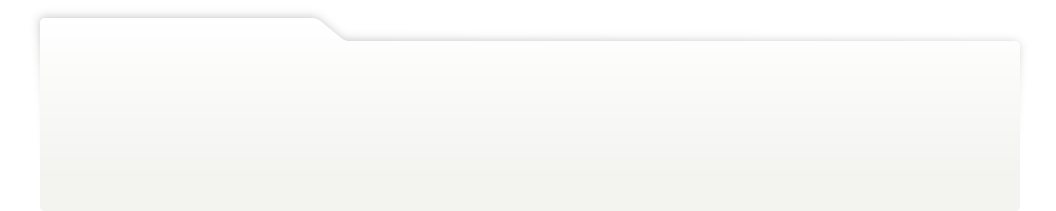
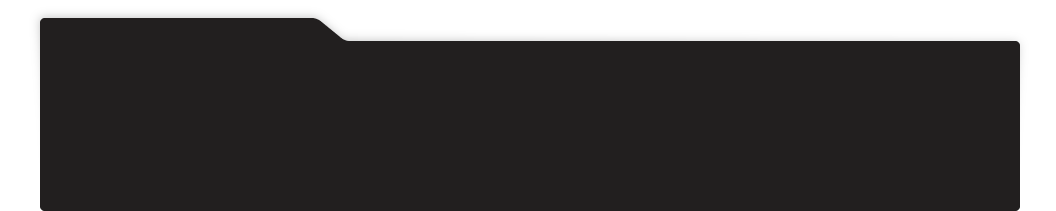
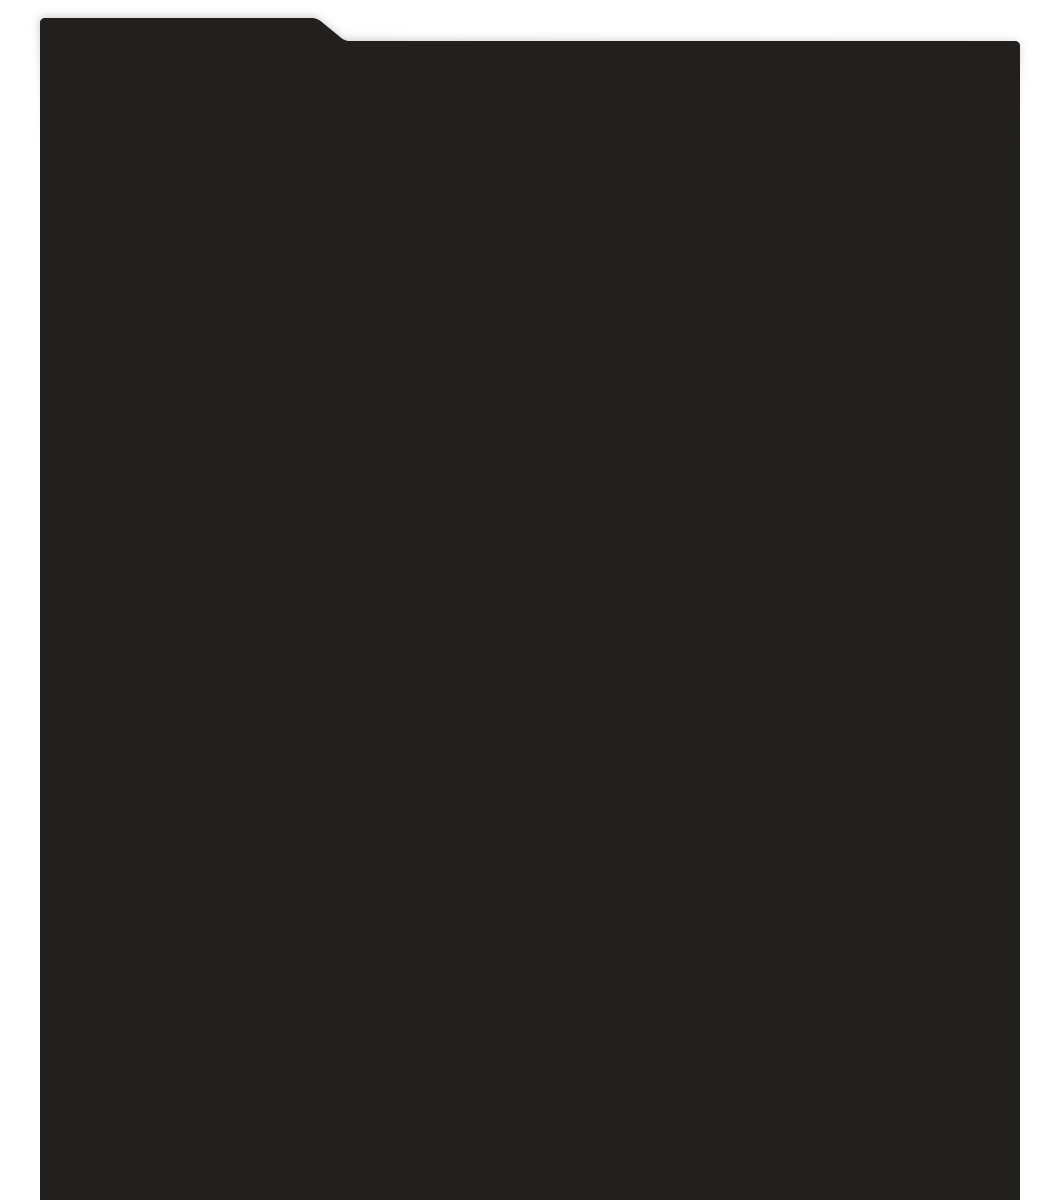
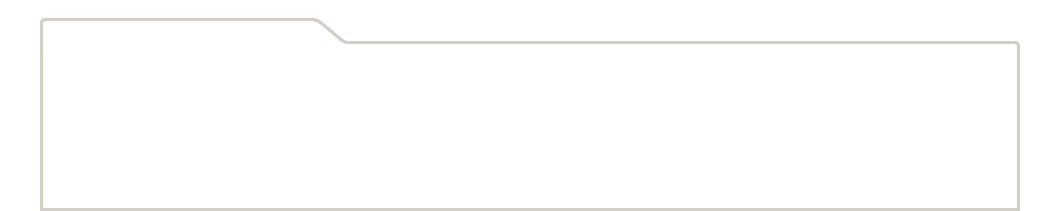
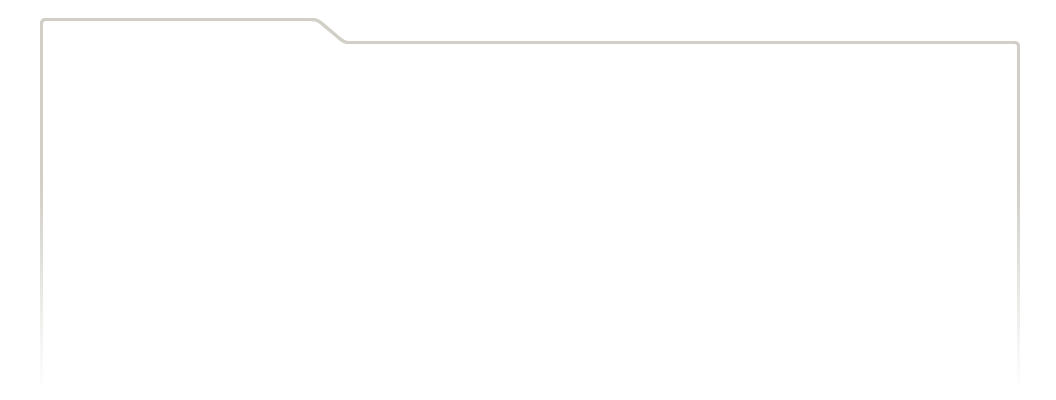
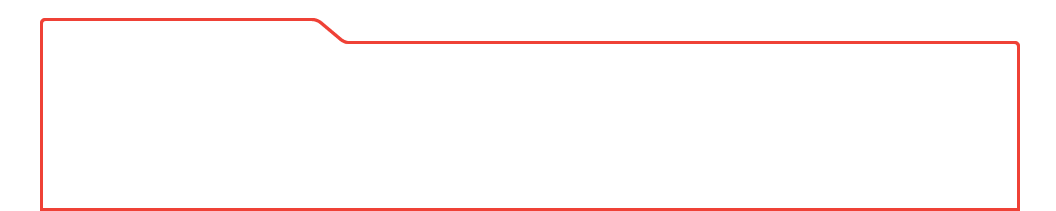
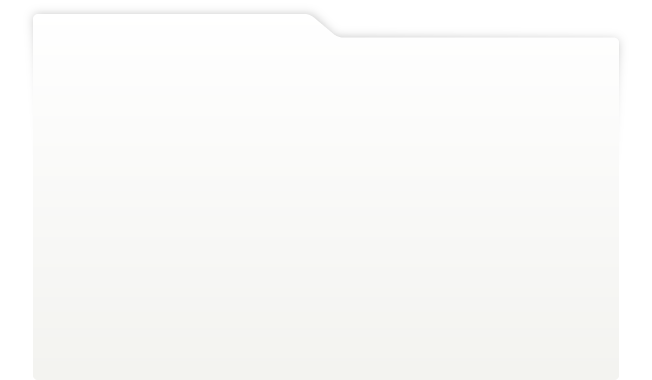
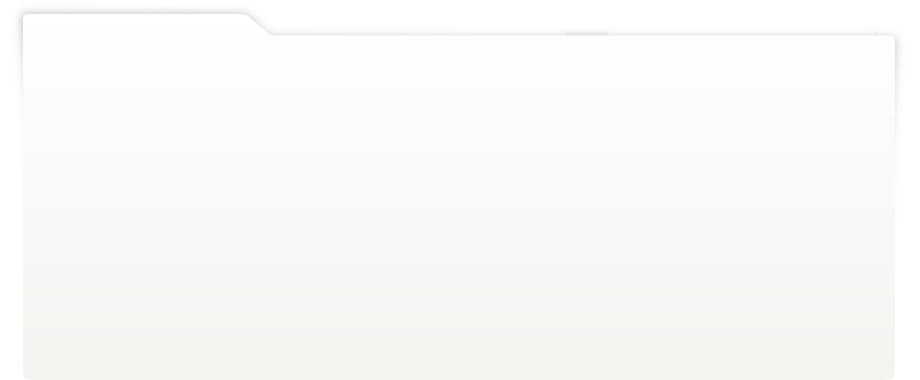
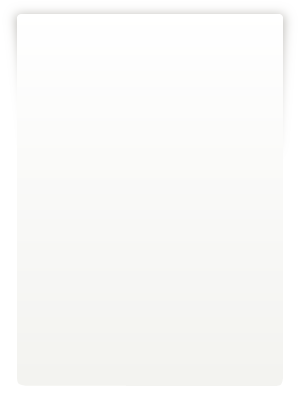
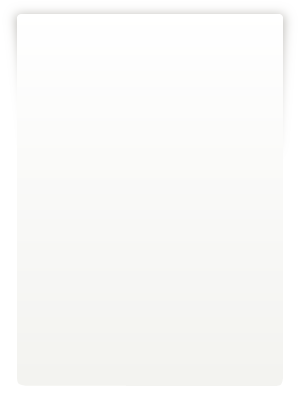
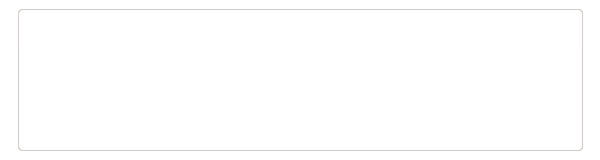
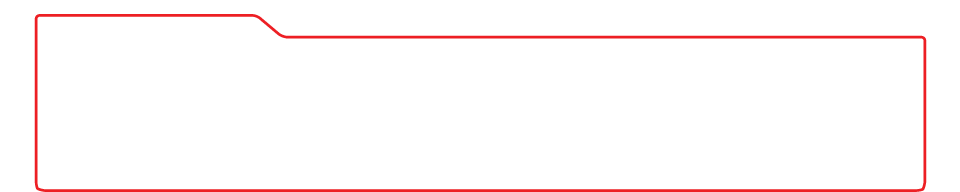
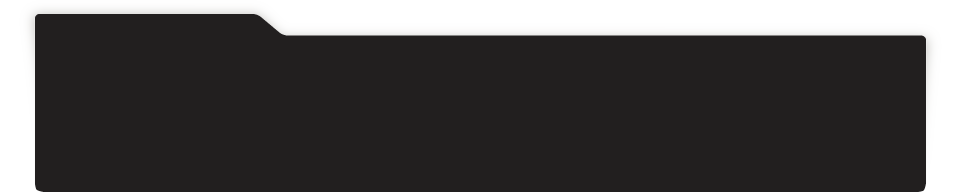
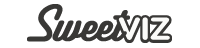
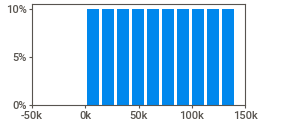
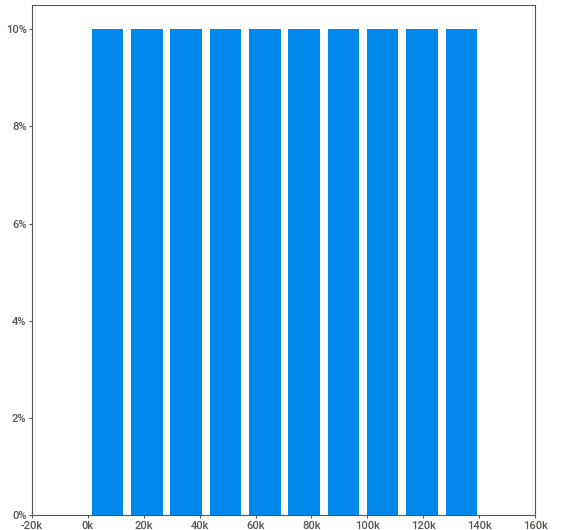
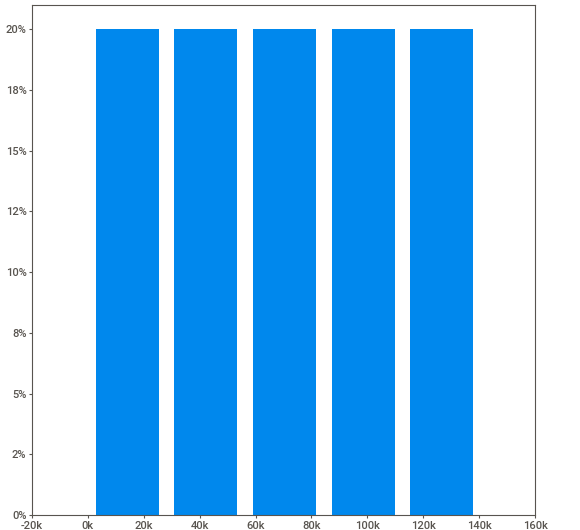
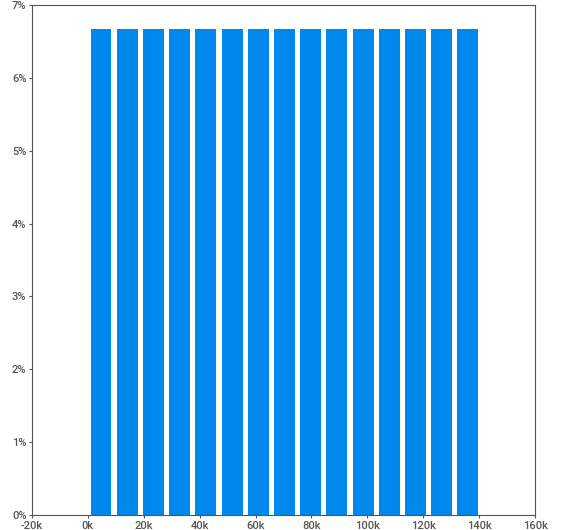
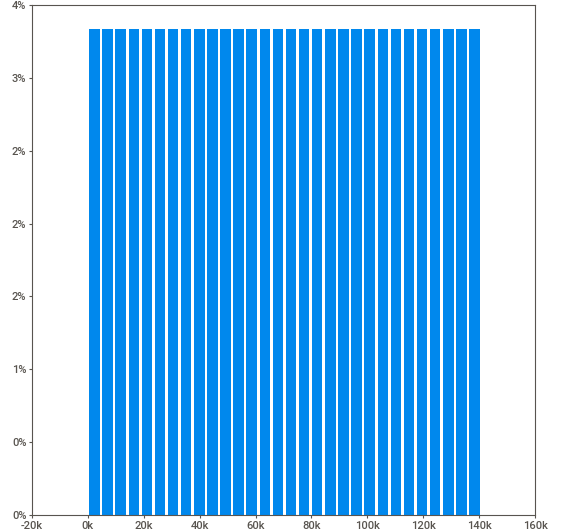
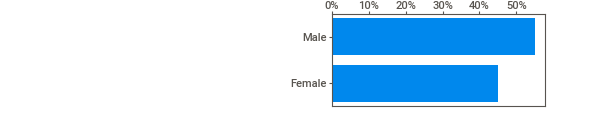
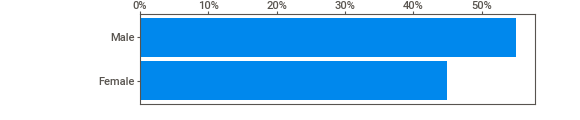
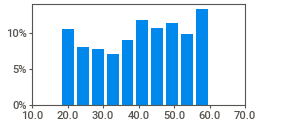
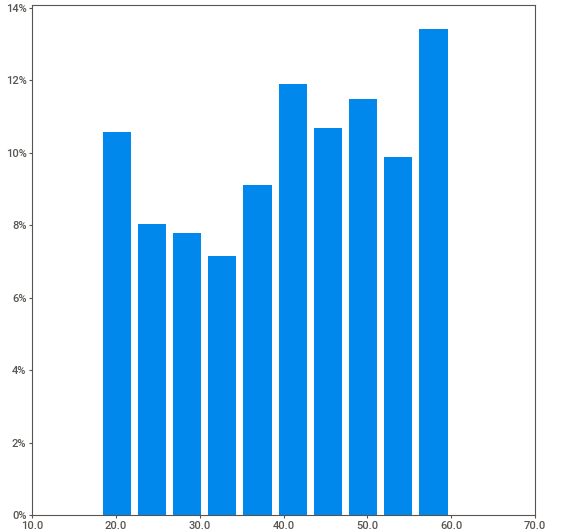
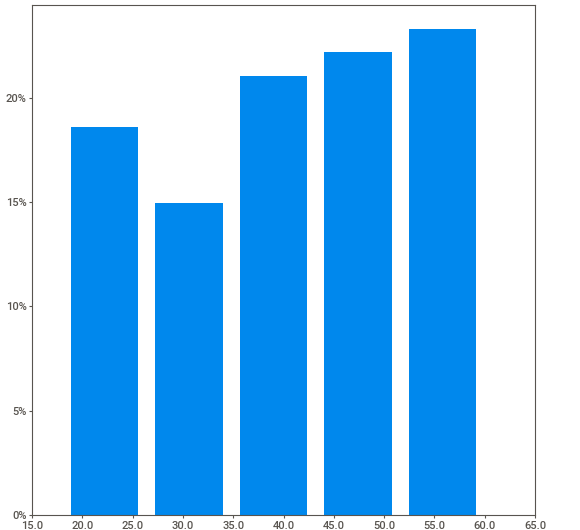
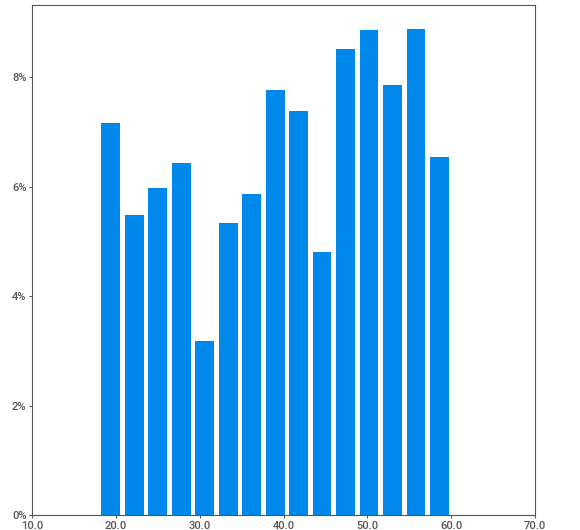
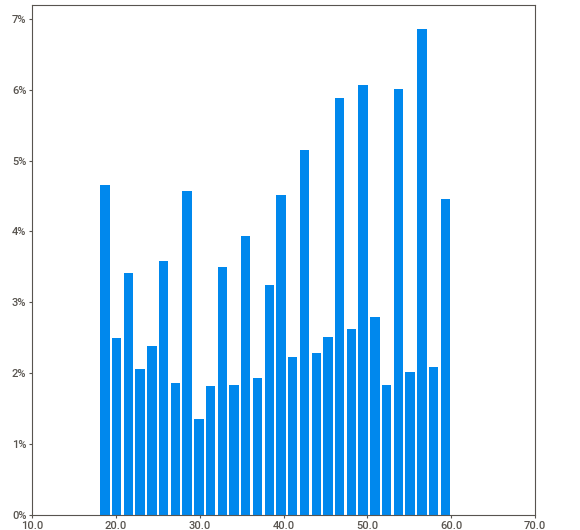
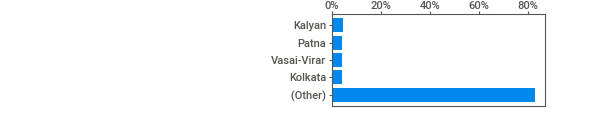
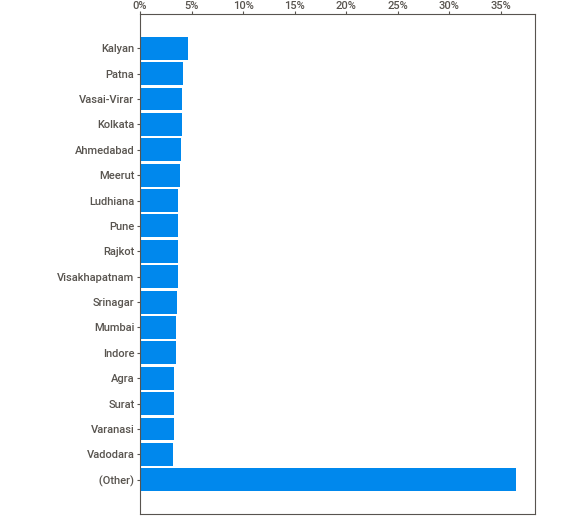
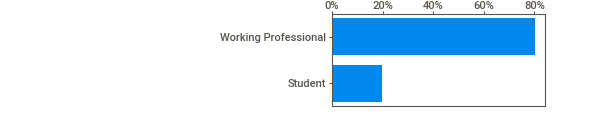
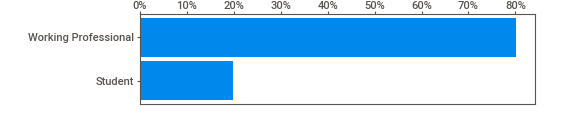
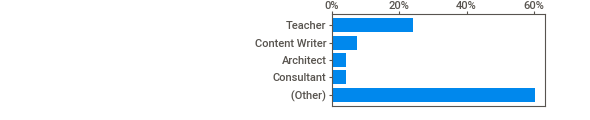
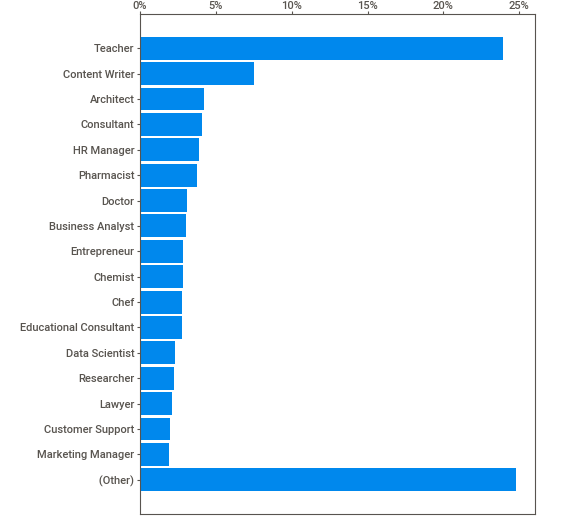
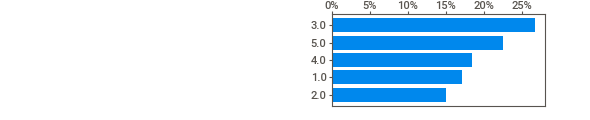
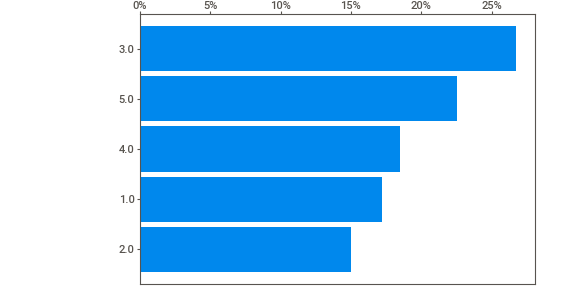
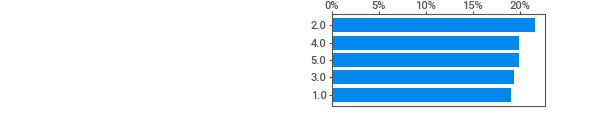
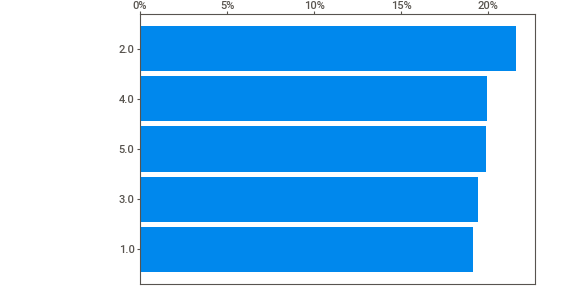
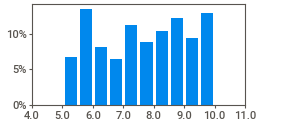
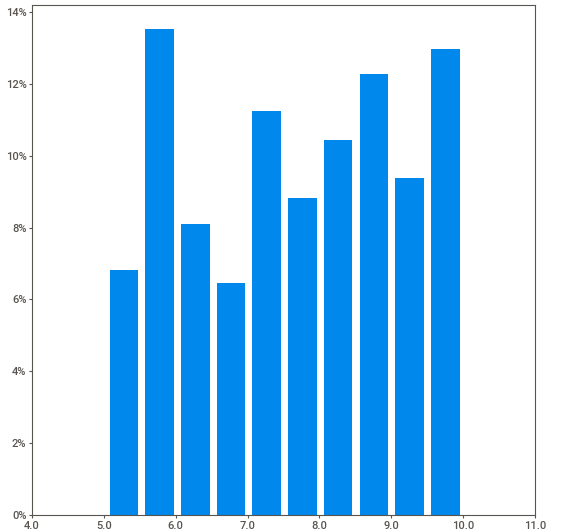
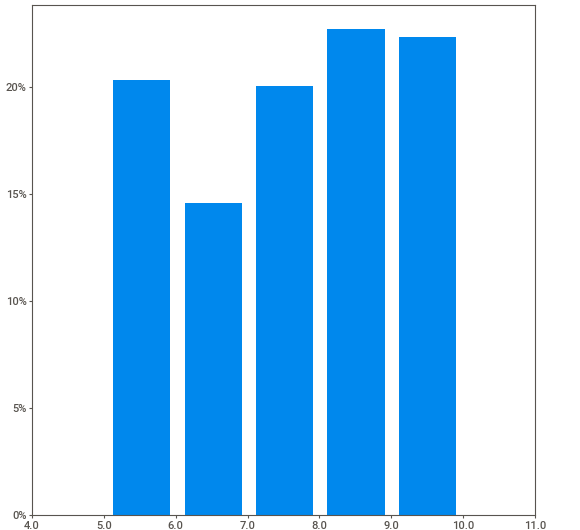
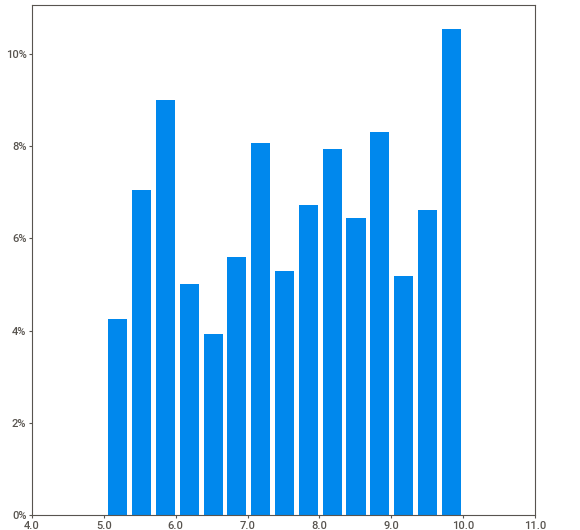
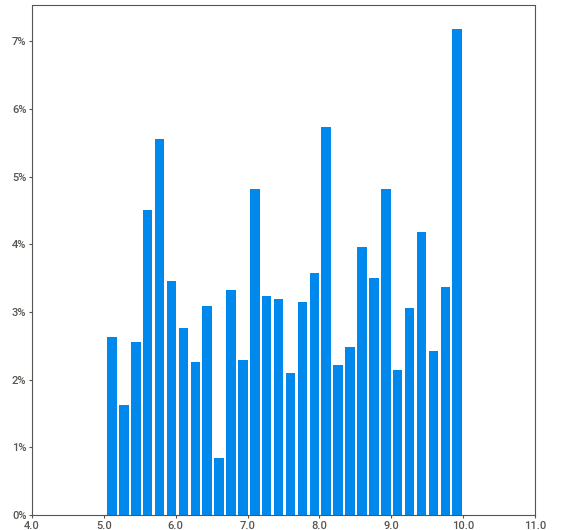
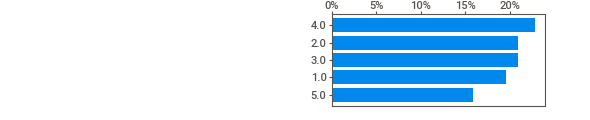
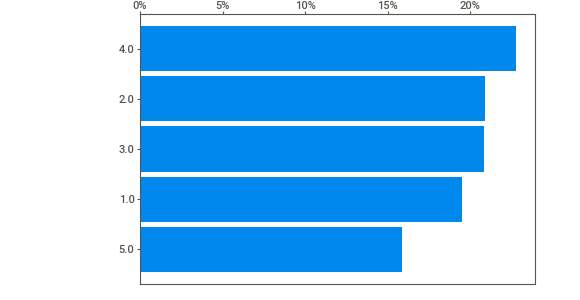
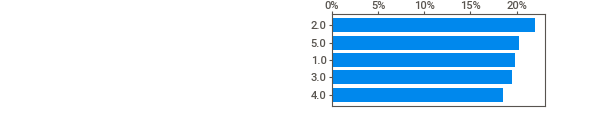
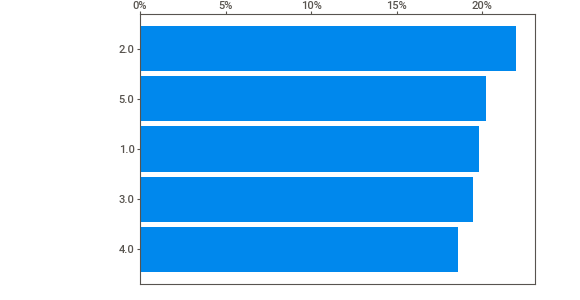
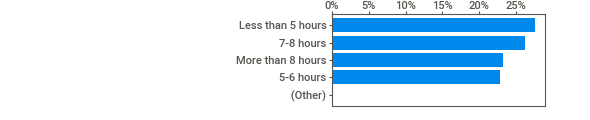
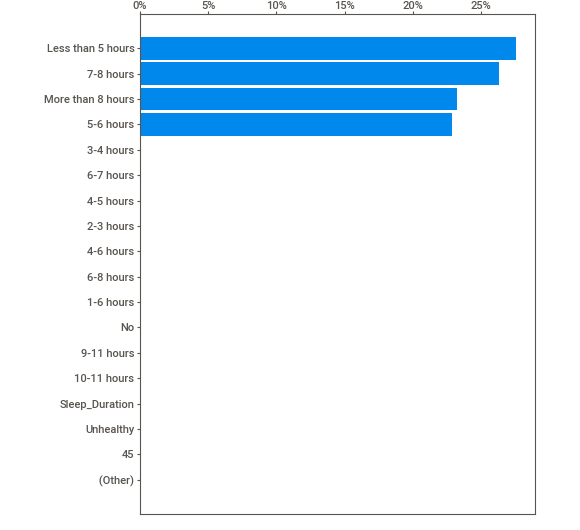
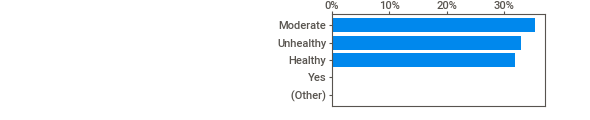
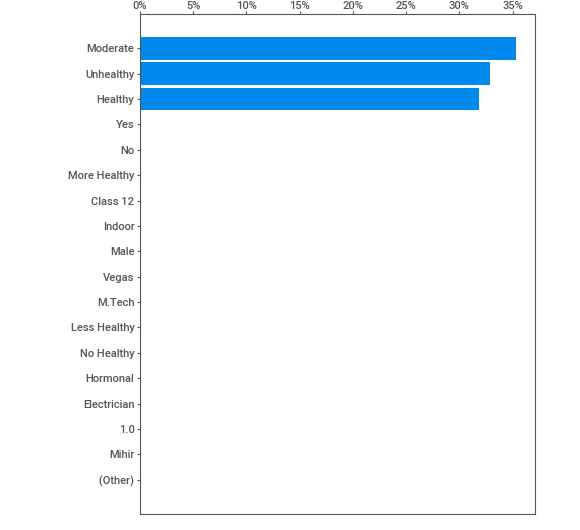
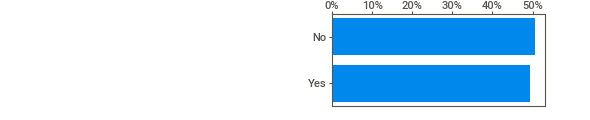
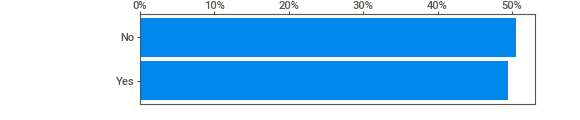
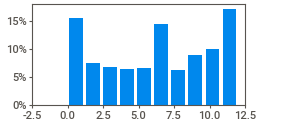
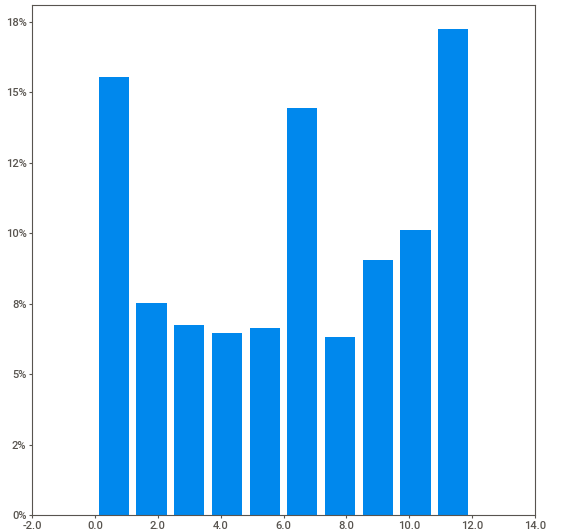
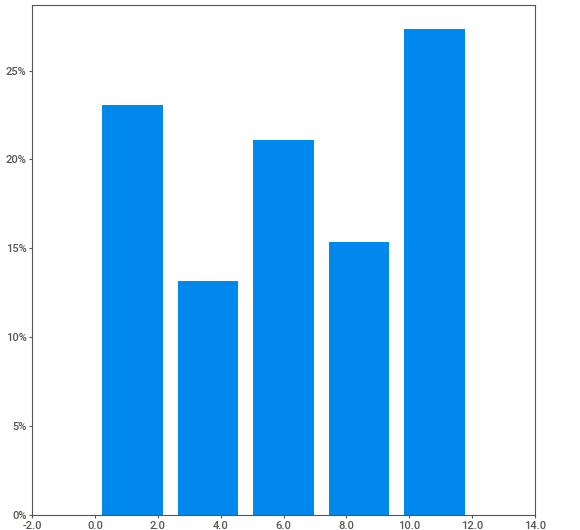
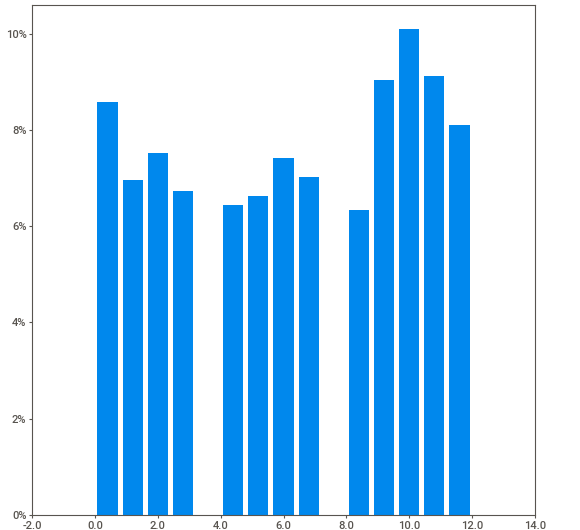
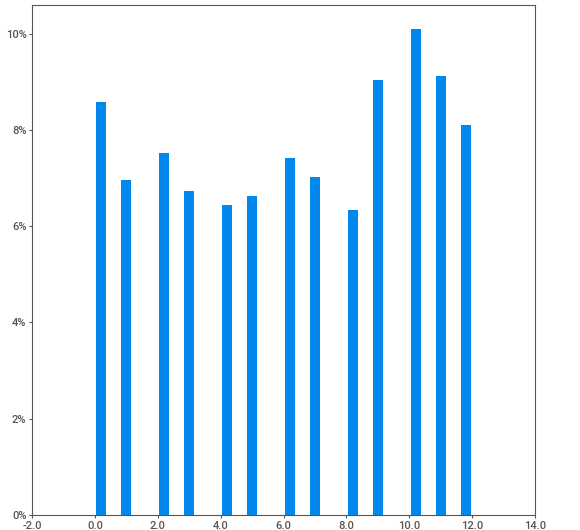
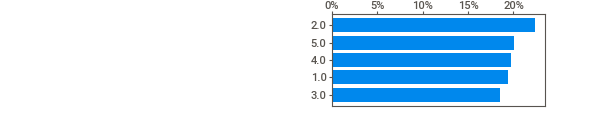
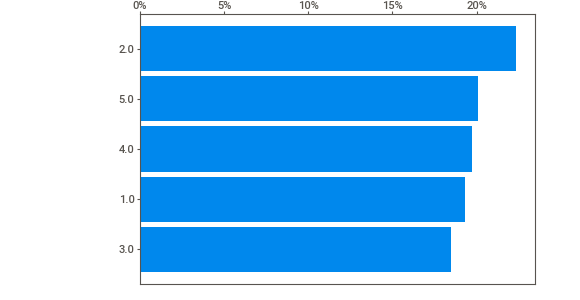
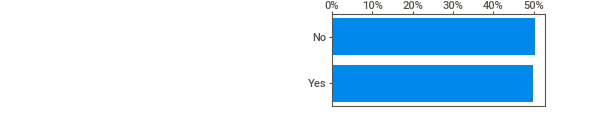
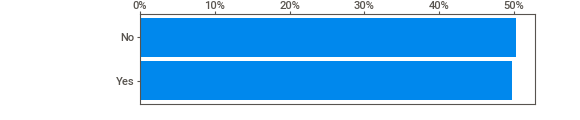
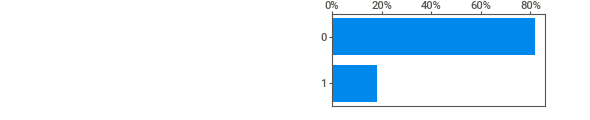
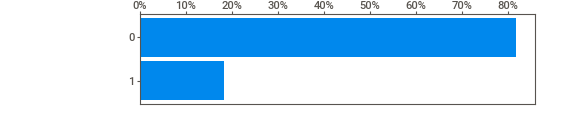
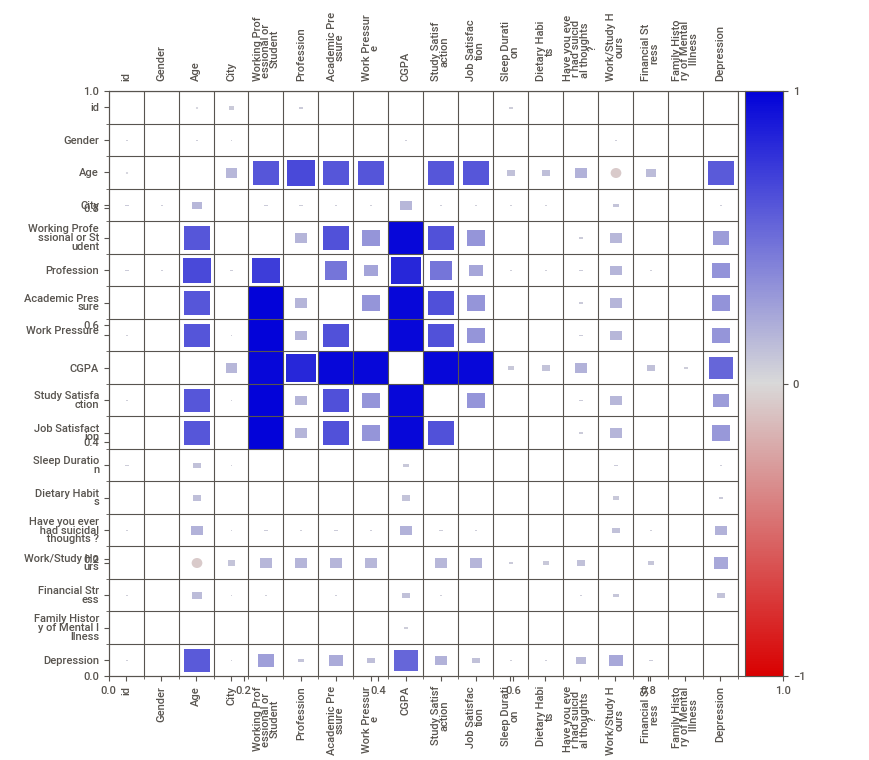
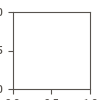

In [12]:
report.show_notebook()

# Remarks :
- We are going to delete : ['Study Satisfaction', 'CGPA', 'Academic Pressure' , ]
- Impute the missing values in work pressure, job satisfaction to average
- drop missing rows in dietary habits, degree
- put missing values in profession in other
- do encoding on categorical variables
- smote on target variable (only for train)

In [13]:
# prompt: delete the rows Study Satisfaction CGPA Academic Pressure from df_train and df_test

df_train = df_train.drop(['Study Satisfaction', 'CGPA', 'Academic Pressure'], axis=1)
df_test = df_test.drop(['Study Satisfaction', 'CGPA', 'Academic Pressure'], axis=1)


In [14]:
# prompt: impute missing values in Job Satisfaction, Work Pressure

# Impute missing values in 'Job Satisfaction' and 'Work Pressure' with the mean
df_train['Job Satisfaction'] = df_train['Job Satisfaction'].fillna(df_train['Job Satisfaction'].mean())
df_train['Work Pressure'] = df_train['Work Pressure'].fillna(df_train['Work Pressure'].mean())

df_test['Job Satisfaction'] = df_test['Job Satisfaction'].fillna(df_test['Job Satisfaction'].mean())
df_test['Work Pressure'] = df_test['Work Pressure'].fillna(df_test['Work Pressure'].mean())


In [15]:
# prompt: drop missing values in Dietary Habits, Degree, Financial Stress from df_train but fill it in df_test

# Drop missing values in 'Dietary Habits', 'Degree', 'Financial Stress' from df_train
df_train.dropna(subset=['Dietary Habits', 'Degree', 'Financial Stress'], inplace=True)

# Fill missing values in 'Dietary Habits', 'Degree', 'Financial Stress' in df_test with the most frequent value
for col in ['Dietary Habits', 'Degree', 'Financial Stress']:
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])


In [16]:
# prompt: put missing values in Profession to (Other)

# Fill missing values in 'Profession' with 'Other'
df_train['Profession'] = df_train['Profession'].fillna('(Other)')
df_test['Profession'] = df_test['Profession'].fillna('(Other)')


In [17]:
# prompt: create a variable containing the names of the categorical variables from df_train

# Identify categorical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# Remove the target variable if present in the categorical columns
if 'Depression' in categorical_cols:
  categorical_cols.remove('Depression')

categorical_cols


['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [18]:
# prompt: do categorical encoding on variables

import pandas as pd
# Create a list of categorical columns

# Perform one-hot encoding on categorical features
df_train = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)


In [19]:
df_train.isnull().sum().sum()

0

In [20]:
# prompt: do SMOTE on the target variable 'Depression'

import pandas as pd
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = df_train.drop('Depression', axis=1)
y = df_train['Depression']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_train_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_train_resampled['Depression'] = y_resampled


In [22]:
# prompt: do cross validation on xgboost classifier

import numpy as np
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the number of folds for cross-validation
n_folds = 5

# Initialize KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(xgb_classifier, X_resampled, y_resampled, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation of accuracy:", np.std(scores))


Cross-validation scores: [0.95815509 0.95691733 0.95791622 0.95698248 0.95782845]
Mean accuracy: 0.9575599132633268
Standard deviation of accuracy: 0.0005098328279242283


In [23]:
# prompt: make the train and test data have the same columns except for the Depression and fill new columns in the test data with 0

# Align columns between train and test sets
# Get a list of columns that are present in both train and test DataFrames
common_cols = list(set(df_train_resampled.columns) & set(df_test.columns))

# Add missing columns to the test set and fill them with 0
for col in df_train_resampled.columns:
    if col not in df_test.columns and col != 'Depression':
        df_test[col] = 0
# Reorder the columns of the test DataFrame to match the train DataFrame
df_test = df_test[df_train_resampled.columns.drop('Depression')]


In [24]:
# prompt: predict test values

import pandas as pd
# Train the model on the entire resampled training data
xgb_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
test_predictions = xgb_classifier.predict(df_test)

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': df_test.index, 'Depression': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [25]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'id': df_test.index + 140700 , 'Depression': test_predictions})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)
